In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read exp_kriging_output.csv
doe = pd.read_csv("exp_kriging_input.csv", index_col=0)
results = pd.read_csv("exp_kriging_output.csv", index_col=0)

In [3]:
# merge doe and results
doe_results = pd.merge(doe, results, left_index=True, right_index=True)

In [4]:
doe_results

,num_sample,problem,seed,progress,mae,mse,r2,cpu_time
0,2,Forrester_1a,1,NaN,NaN,NaN,NaN,NaN
1,4,Forrester_1a,1,NaN,NaN,NaN,NaN,NaN
2,6,Forrester_1a,1,NaN,NaN,NaN,NaN,NaN
3,8,Forrester_1a,1,NaN,NaN,NaN,NaN,NaN
4,10,Forrester_1a,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2595,32,mf_Sixhump,10,NaN,NaN,NaN,NaN,NaN
2596,34,mf_Sixhump,10,NaN,NaN,NaN,NaN,NaN
2597,36,mf_Sixhump,10,NaN,NaN,NaN,NaN,NaN
2598,38,mf_Sixhump,10,NaN,NaN,NaN,NaN,NaN


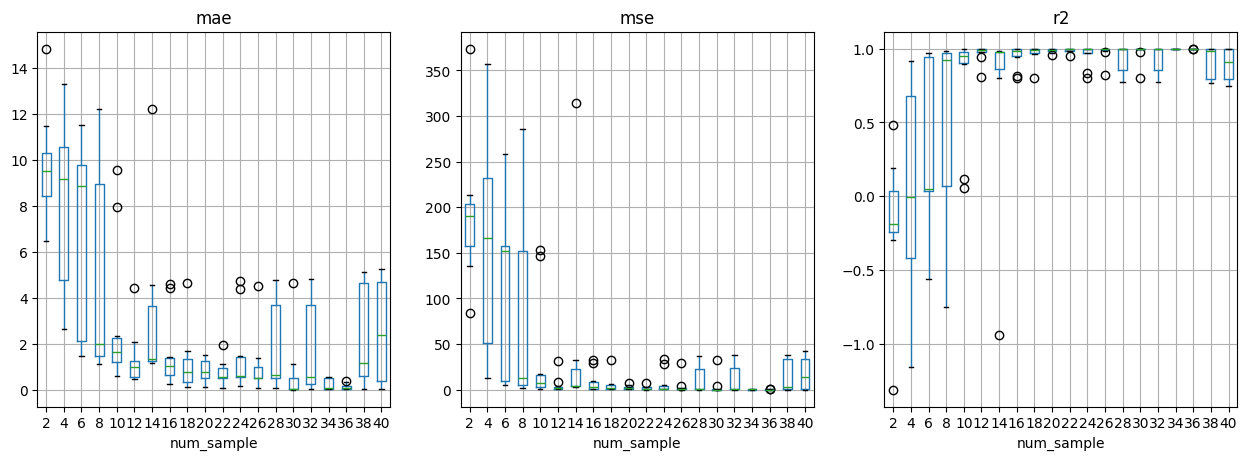

In [6]:
# get function name from problem column


# get a sub-dataframe with only specific problem
doe_results_1b = doe_results[doe_results["problem"] == "mf_Sixhump"]


# plot boxplot regarding mae, mse r2 with respect to different number of samples on  Forrester 1b function
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
doe_results_1b.boxplot(column=["mae"], by="num_sample", ax=ax[0])
doe_results_1b.boxplot(column=["mse"], by="num_sample", ax=ax[1])
doe_results_1b.boxplot(column=["r2"], by="num_sample", ax=ax[2])
ax[0].set_title("mae")
ax[1].set_title("mse")
ax[2].set_title("r2")
plt.suptitle("")
plt.show()

In [15]:
# results of num_sample = 10
doe_results_1b[doe_results_1b["num_sample"] == 20]

,num_sample,problem,seed,progress,mae,mse,r2,cpu_time
2409,20,mf_Sixhump,1,finished,1.524259,6.768110,0.958062,0.097877
2429,20,mf_Sixhump,2,finished,0.982498,2.026597,0.987474,0.087219
2449,20,mf_Sixhump,3,finished,0.536623,0.385235,0.997635,0.312943
2469,20,mf_Sixhump,4,finished,0.534424,0.412646,0.997533,0.238781
2489,20,mf_Sixhump,5,finished,0.509121,0.360666,0.997790,0.235624
2509,20,mf_Sixhump,6,finished,0.137263,0.134958,0.999166,0.345666
2529,20,mf_Sixhump,7,finished,1.525610,5.038327,0.969531,0.064034
2549,20,mf_Sixhump,8,finished,1.106037,2.475451,0.984676,0.154866
2569,20,mf_Sixhump,9,finished,0.572742,0.541819,0.996529,0.163441
2589,20,mf_Sixhump,10,finished,1.324032,3.005728,0.981776,0.077668


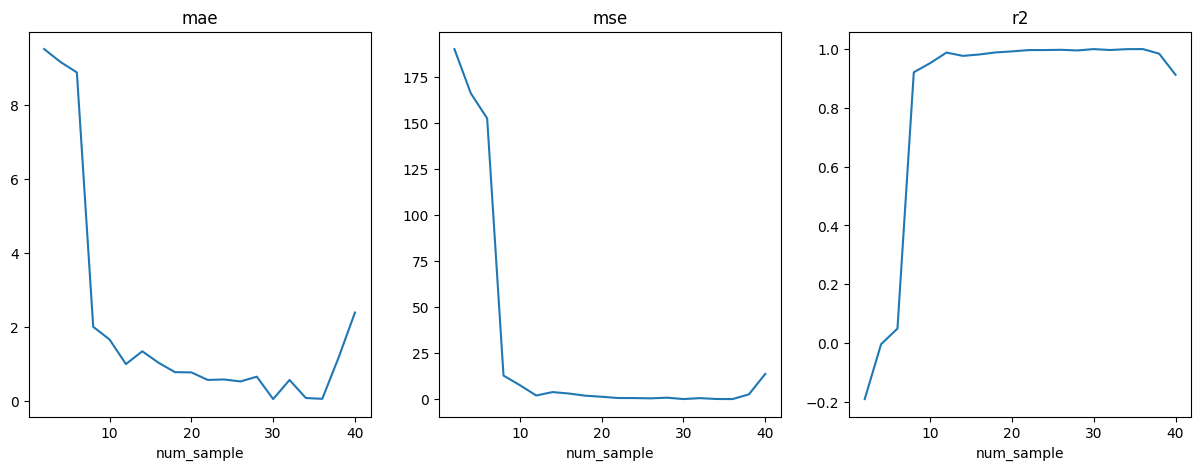

In [7]:
# plot median value regarding mae, mse r2 with respect to different number of samples
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
doe_results_1b.groupby(["num_sample"])["mae"].median().plot(ax=ax[0])
doe_results_1b.groupby(["num_sample"])["mse"].median().plot(ax=ax[1])
doe_results_1b.groupby(["num_sample"])["r2"].median().plot(ax=ax[2])
ax[0].set_title("mae")
ax[1].set_title("mse")
ax[2].set_title("r2")
plt.suptitle("")
plt.show()